In [484]:
'''
Necessary import 
reading the data
data_url:
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
'''
import pandas as pd
data=pd.read_csv("netflix.csv")

In [485]:
# Glance of data
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [486]:
# always good to take a backup 
df=data.copy(deep=True)

In [487]:
#checking if implicit index is proper
df.iloc[0]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                          NaN
country                                             United States
date_added                                     September 25, 2021
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
Name: 0, dtype: object

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [489]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [490]:
# which col has how many null
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Notes : (For personal reference)
> df.isna().sum()

>isnull() and isna() literally does the same things. isnull() is just an alias of the isna() method

# 1>How has the number of movies released per year changed over the last 20-30 years?
* since the year column has no null, no preprocessing required for this statement

In [491]:
# in each year how many movies was released 
value_counts=df["release_year"].value_counts()
value_counts

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [492]:
# in each year how many movies was released 
# converting this data to dataframe
value_counts=df["release_year"].value_counts()
df_val = pd.DataFrame(value_counts)
df_value = df_val.reset_index()
df_value.columns = ['release_year', 'counts'] 
df_value

,release_year,counts
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1966,1
70,1925,1
71,1947,1
72,1959,1


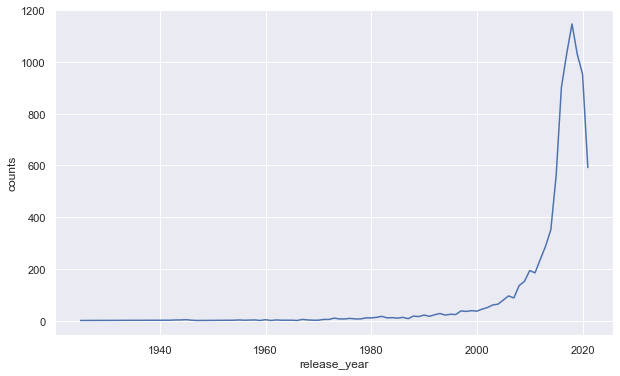

In [493]:
# necessary import
import seaborn as sns
import matplotlib.pyplot as plt
# adjust fig size
sns.set(rc = {'figure.figsize':(10,6)})
sns.lineplot(x= 'release_year', y= 'counts', data = df_value)
plt.show()

* we observe an overall release scenario
* To understand the behaviour in detail let us segragate the tv and movie releases

> Note : our assumption for Question 2 is 
* movie duration is int(min) format 
* series contains the word --seasons / season in "duration" column
*** I understand str.contains('season',...) would have given the same result as
>df.loc[df['duration'].str.contains('Seasons|Season',na=False,case=False)]
* but I wanted to explore multivalue check for practice and choose to keep it thatway for my future reference

-----------------------------------------------------------------------------------
* We have 3 null values in "duration" column , we need to drop those for next part


# 2>Comparison of tv shows vs. movies.

In [494]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [495]:
df = df[df['duration'].notna()]
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

* we observe all rows with duration as null is dropped

In [496]:
tv_series=df.loc[df['duration'].str.contains('Seasons|Season',na=False,case=False)]
tv_series.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


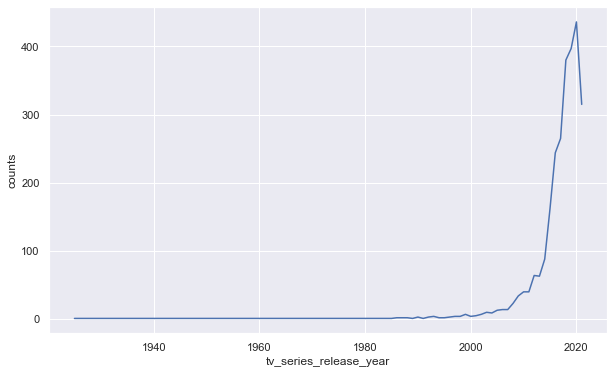

In [497]:
# tv series release year and corresponding count 
value_counts_tv_series=tv_series["release_year"].value_counts()
# convert the data into df 
df_val_tv_series = pd.DataFrame(value_counts_tv_series)
df_value_tv_series = df_val_tv_series.reset_index()
df_value_tv_series.columns = ['tv_series_release_year', 'counts'] 
# For plot set fig size
sns.set(rc = {'figure.figsize':(10,6)})
sns.lineplot(x= 'tv_series_release_year', y= 'counts', data = df_value_tv_series)
plt.show()

In [498]:
# this part is for movies data
movies=df.loc[df['duration'].str.contains('Seasons|Season',na=False,case=False)==False]
movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


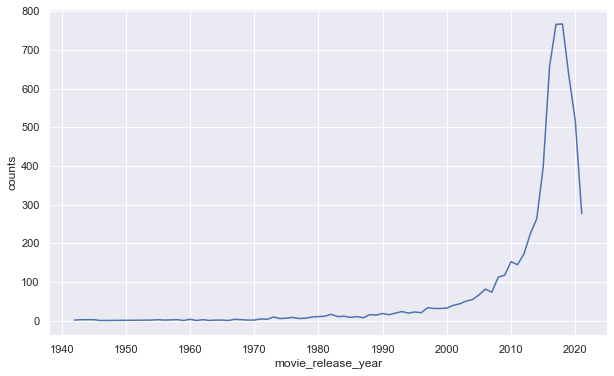

In [499]:
## tv series release year and corresponding count 
value_counts_movies=movies["release_year"].value_counts()
df_val_movies= pd.DataFrame(value_counts_movies)
df_value_movies = df_val_movies.reset_index()
df_value_movies.columns = ['movie_release_year', 'counts'] 
sns.set(rc = {'figure.figsize':(10,6)})
sns.lineplot(x= 'movie_release_year', y= 'counts', data = df_value_movies)
plt.show()

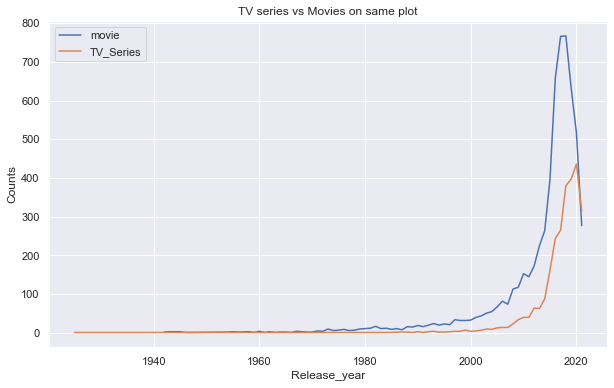

In [500]:
# plotting both on the same graph
sns.set(rc = {'figure.figsize':(10,6)})
sns.lineplot(x= 'movie_release_year', y= 'counts', label="movie",data = df_value_movies)
sns.lineplot(x= 'tv_series_release_year', y= 'counts', label="TV_Series",data = df_value_tv_series)
plt.title("TV series vs Movies on same plot")
plt.legend(loc="upper left")
plt.xlabel("Release_year")
plt.ylabel("Counts")
plt.show()

# 5> Does Netflix has more focus on TV Shows than movies in recent years ?
* From the plot it does appear so
* The decline in new release around 2020 is because the production was at halt due to covid lockdown


-------------------------
# 2.2>Next We intend to understand the trend based on genera

In [501]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

Since the contents of the listed_in column is not missing no rows need to be dropped 

In [502]:
# Extracting the relevant columns
vals = df[['release_year','listed_in']]

In [503]:
#listed_in column contains comma seperated values , 
# splitting the values and putting them in new rows
all_rec_df = [pd.Series(row['release_year'],row['listed_in'].split(","))              
                    for _, row in vals.iterrows()]
#Reset index
all_rec_df = pd.concat(all_rec_df).reset_index()
#rename column
all_rec_df.columns = ['genre','year']
# this is imp cause it was taking "drama " and "drama" as seperate
all_rec_df["genre"]=all_rec_df["genre"].str.strip()
all_rec_df.head()

,genre,year
0,Documentaries,2020
1,International TV Shows,2021
2,TV Dramas,2021
3,TV Mysteries,2021
4,Crime TV Shows,2021


In [504]:
all_rec_df["genre"].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [505]:
# this is vip to convert the genre into individual col and populate it's count yearwise
dummies = all_rec_df['genre'].str.get_dummies()
dummies.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [506]:
tidy_movie_ratings = (pd.concat([all_rec_df, dummies], axis=1))
tidy_movie_ratings.head()

,genre,year,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,Documentaries,2020,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,International TV Shows,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TV Dramas,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,TV Mysteries,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Crime TV Shows,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [507]:
tidy_movie_ratings.drop(["genre"], axis=1,inplace=True,errors='ignore')
tidy_movie_ratings.reset_index(inplace=True)
tidy_movie_ratings.head()

,index,year,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,2020,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [508]:
#tidy_movie_ratings.columns = tidy_movie_ratings.columns.str.strip()
#tidy_movie_ratings.columns=tidy_movie_ratings.columns.str.strip()

top_genre = (tidy_movie_ratings.iloc[:, 2:] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(15) # get the first 15
              .index.values # get the genre names
              )
top_genre

array(['International Movies', 'Dramas', 'Comedies',
       'International TV Shows', 'Documentaries', 'Action & Adventure',
       'TV Dramas', 'Independent Movies', 'Children & Family Movies',
       'Romantic Movies', 'TV Comedies', 'Thrillers', 'Crime TV Shows',
       "Kids' TV", 'Docuseries'], dtype=object)

In [509]:
genre_groups = (tidy_movie_ratings.groupby("year")
                .sum()
               ).loc[:,top_genre]
genre_groups.head()

,International Movies,Dramas,Comedies,International TV Shows,Documentaries,Action & Adventure,TV Dramas,Independent Movies,Children & Family Movies,Romantic Movies,TV Comedies,Thrillers,Crime TV Shows,Kids' TV,Docuseries
year,,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1942,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1943,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1945,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Total Films based on genre'}, xlabel='year'>

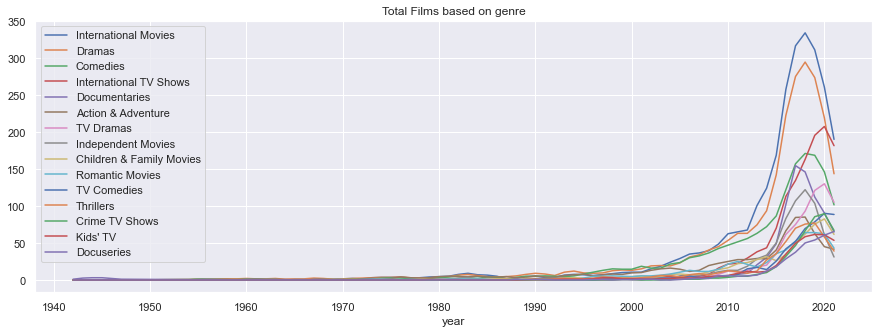

In [510]:
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Films based on genre")

### we observe before 2000 nothing much happen so we focus on post 2000 and let us see top 10 genere
### instead of 15

<AxesSubplot:title={'center':'Total Films/shows based on genre'}, xlabel='year'>

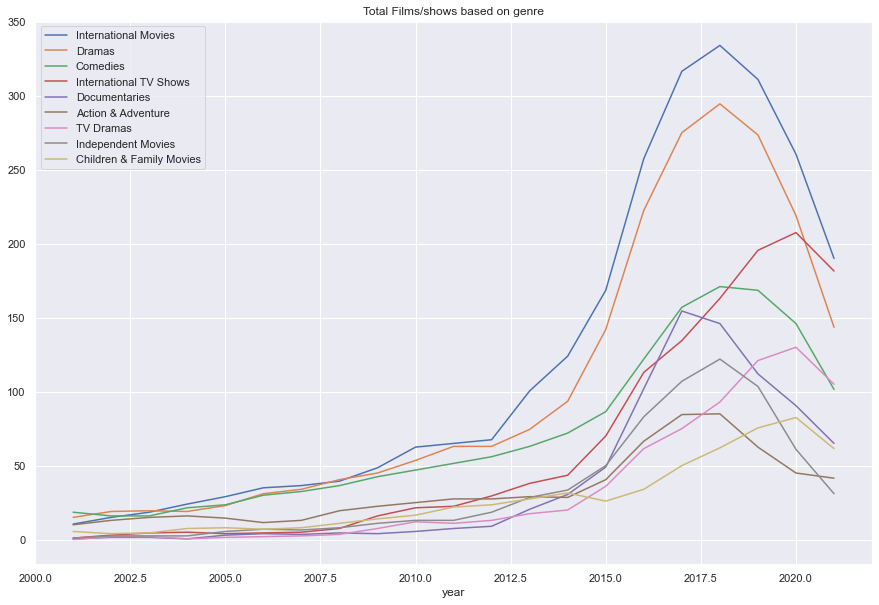

In [511]:
genre_groups = (tidy_movie_ratings.groupby("year")
                .sum()
               ).loc[2000:,top_genre[:9]]
genre_groups.rolling(2).mean().plot(figsize=(15,10),
                                    title="Total Films/shows based on genre")

* Note similar analysis can be done for movies and tv shows seperately

* but for this project I choose to skip it due to repeatitive nature of task

# 3>Best Time to release a movie

In [512]:
#tidy_movie_ratings = (pd.concat([all_rec_df, dummies], axis=1))

In [513]:
df["date_added"]
df[["month","day","year","drop"]]=df['date_added'].str.split(' ', expand=True)
best_release_time = df[["month","release_year"]]
best_release_time.head()

,month,release_year
0,September,2020
1,September,2021
2,September,2021
3,September,2021
4,September,2021


In [514]:

best_release_time.isnull().sum()

month           10
release_year     0
dtype: int64

In [515]:

best_release_time[pd.isnull(best_release_time).any(axis=1)]

,month,release_year
6066,NaN,2013
6174,NaN,2018
6795,NaN,2003
6806,NaN,2003
6901,NaN,2008
7196,NaN,2010
7254,NaN,2012
7406,NaN,2016
7847,NaN,2015
8182,NaN,2015


In [516]:
best_release_time = best_release_time[best_release_time['month'].notna()]

In [517]:
best_release_time.isnull().sum()

month           0
release_year    0
dtype: int64

In [518]:
# trying to observe best time after 2000 to keep data relevant
temp_df=best_release_time[best_release_time['release_year']>2000]
temp_df.sort_values("release_year",ascending=False)

,month,release_year
744,June,2021
829,May,2021
771,June,2021
772,June,2021
781,June,2021
...,...,...
8623,January,2001
1121,April,2001
657,June,2001
5672,December,2001


In [519]:
temp_df[temp_df["release_year"]<2000]

,month,release_year


In [520]:
val=temp_df.groupby(['release_year',"month"]).size()
#val.columns=['release_year',"month","count"]
print(type(val))
val

<class 'pandas.core.series.Series'>


release_year  month    
2001          April         7
              August        4
              December      4
              February      1
              January       6
                           ..
2021          June         86
              March        58
              May          59
              November      1
              September    69
Length: 260, dtype: int64

In [521]:
temp_df[(temp_df["release_year"]==2021) & (temp_df["month"]=="June")].count()

month           86
release_year    86
dtype: int64

In [522]:
val= pd.DataFrame(val)
val = val.reset_index()
val.columns = ['release_year',"month","count"]
val


,release_year,month,count
0,2001,April,7
1,2001,August,4
2,2001,December,4
3,2001,February,1
4,2001,January,6
...,...,...,...
255,2021,June,86
256,2021,March,58
257,2021,May,59
258,2021,November,1


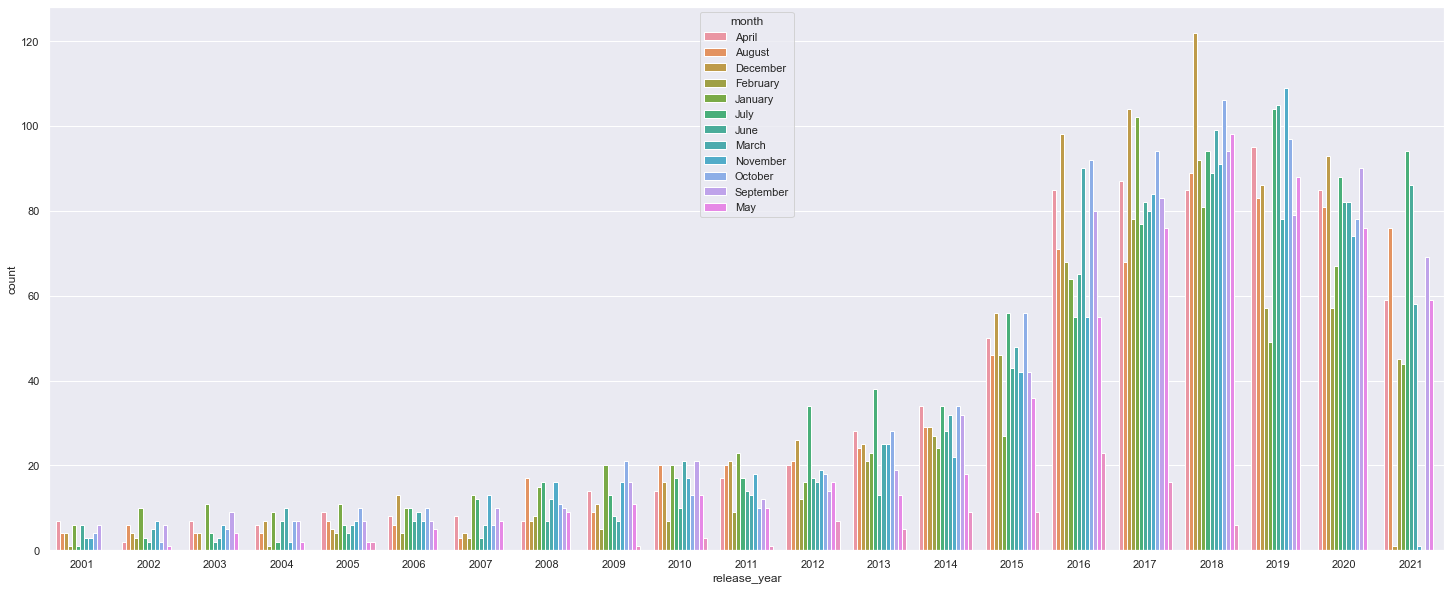

In [523]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(x="release_year", y="count", hue="month", data=val)
plt.show()

# let us consider only the last five years of data

<AxesSubplot:xlabel='release_year', ylabel='count'>

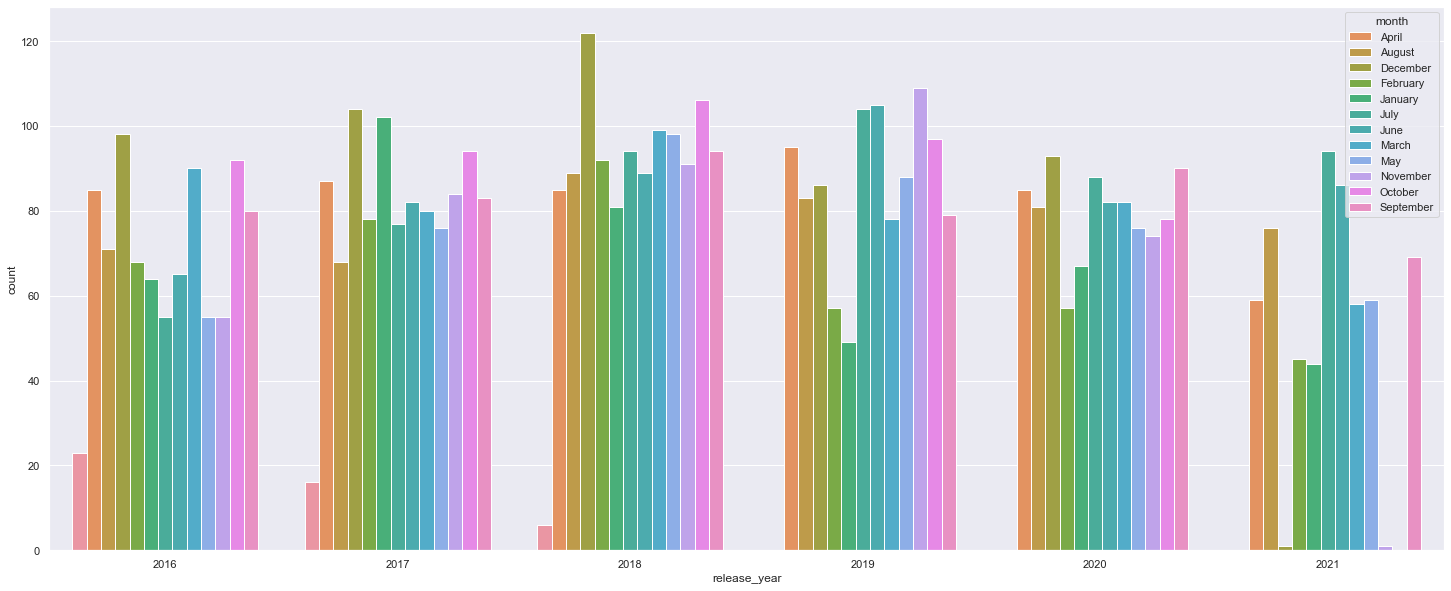

In [524]:
temp_df_2015=best_release_time[best_release_time['release_year']>2015]
val=temp_df_2015.groupby(['release_year',"month"]).size()
val= pd.DataFrame(val)
val = val.reset_index()
val.columns = ['release_year',"month","count"]
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(x="release_year", y="count", hue="month", data=val)

In [525]:
temp=val.groupby(["month"]).sum()
temp.reset_index()
temp.drop(["release_year"],axis=1,inplace=True)
temp.sort_values("count",ascending=False)


,count
month,
July,512
June,509
December,504
April,496
September,495
March,487
August,468
October,467
May,452


* from plot and average ( mode to be precise )
* we caan conclude July is the most popular month for movie release

# 4>Analysis of actors/directors of different types of shows/movies.

In [526]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,year,drop
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,"25,",2021,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,"24,",2021,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,"24,",2021,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,"24,",2021,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,"24,",2021,None


In [527]:
act_direct = df[['release_year','director','cast','listed_in']]
act_direct

,release_year,director,cast,listed_in
0,2020,Kirsten Johnson,NaN,Documentaries
1,2021,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries"
2,2021,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act..."
3,2021,NaN,NaN,"Docuseries, Reality TV"
4,2021,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,2007,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers"
8803,2018,NaN,NaN,"Kids' TV, Korean TV Shows, TV Comedies"
8804,2009,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies"
8805,2006,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies"


In [528]:
act_direct.isnull().sum()

release_year       0
director        2634
cast             825
listed_in          0
dtype: int64

In [529]:
direct = act_direct[act_direct['director'].notna()]
direct.isnull().sum()
# we want to see dir who are active from 2000 till date
direct=direct[direct["release_year"]>2000]

In [530]:
direct["release_year"].min()

2001

### >Directors have comma seperated value 
### >Need to split it into rows for proper count of movies they are involved in 

In [531]:
clean_dir=direct.loc[direct['director'].str.contains(',')]
clean_dir

,release_year,director,cast,listed_in
6,2021,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies
16,2020,"Pedro de Echave García, Pablo Azorín Williams",NaN,"Documentaries, International Movies"
23,2021,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",Children & Family Movies
30,2021,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...","Dramas, Independent Movies, International Movies"
68,2021,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,"Documentaries, International Movies, Sports Mo..."
...,...,...,...,...
8725,2002,"Rudy Soedjarwo, Riri Riza","Dian Sastrowardoyo, Nicholas Saputra, Ladya Ch...","Dramas, International Movies, Romantic Movies"
8727,2013,"Ritu Sarin, Tenzing Sonam",NaN,"Documentaries, International Movies"
8728,2016,"Heidi Brandenburg, Mathew Orzel",NaN,"Documentaries, International Movies"
8737,2016,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,Documentaries


In [532]:
direct=direct.assign(director=direct['director'].str.split(',')).explode('director')
direct

,release_year,director,cast,listed_in
0,2020,Kirsten Johnson,NaN,Documentaries
2,2021,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act..."
5,2021,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","TV Dramas, TV Horror, TV Mysteries"
6,2021,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies
6,2021,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies
...,...,...,...,...
8801,2015,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","Dramas, International Movies, Thrillers"
8802,2007,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers"
8804,2009,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies"
8805,2006,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies"


In [533]:
# cross check to see no comma seperated dir present 
clean_dir=direct.loc[direct['director'].str.contains(',')]
clean_dir

,release_year,director,cast,listed_in


In [534]:
busy_dir = direct["director"].value_counts()
busy_dir= pd.DataFrame(busy_dir)
busy_dir = busy_dir.reset_index()
busy_dir
busy_dir.columns = ['director', 'counts'] 
sorted1=busy_dir.sort_values(by=["counts"],ascending = False).head(10)
sorted1


,director,counts
0,Rajiv Chilaka,22
2,Jan Suter,18
1,Raúl Campos,18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Don Michael Paul,10
9,Shannon Hartman,9


# These are the list of 10 most active directors in the 21st century

In [535]:
temp_direct=direct[["director","listed_in"]]
#temp_direct[temp_direct["director"].str.contains("Rajiv Chilaka")]
temp_sorted=sorted1[["director"]]

In [536]:
genre_pref = pd.merge(temp_sorted, temp_direct, on='director', how='inner')
#genre_pref.drop(["cast","release_year","counts"],axis=1,inplace=True)
genre_pref.drop_duplicates(keep="first", inplace=True)
genre_pref.reset_index()
genre_pref


,director,listed_in
0,Rajiv Chilaka,Children & Family Movies
11,Rajiv Chilaka,"Children & Family Movies, Sports Movies"
22,Jan Suter,Stand-Up Comedy
40,Raúl Campos,Stand-Up Comedy
58,Marcus Raboy,"Stand-Up Comedy & Talk Shows, TV Comedies"
59,Marcus Raboy,Stand-Up Comedy
74,Suhas Kadav,"Children & Family Movies, Comedies"
75,Suhas Kadav,"Children & Family Movies, Comedies, Music & Mu..."
76,Suhas Kadav,"Children & Family Movies, Music & Musicals"
81,Suhas Kadav,Children & Family Movies


# These are the various genre and genere combos that the busy directors prefer to work in 
* Question is : 4>Analysis of actors/directors of different types of shows/movies.
* For Actor the same steps have to be repeated - skipping it for this task


# 6>Understanding what content is available in different countries

In [537]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,year,drop
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,"25,",2021,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,"24,",2021,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,"24,",2021,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,"24,",2021,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,"24,",2021,None


In [538]:
country = df[['release_year','country','listed_in']]
country.isnull().sum()

release_year      0
country         831
listed_in         0
dtype: int64

In [539]:
direct = country[country['country'].notna()]
direct.isnull().sum()

release_year    0
country         0
listed_in       0
dtype: int64

In [540]:
direct=direct[direct["release_year"]>2000]
direct["release_year"].min()

2001

In [541]:
direct=direct[['country','listed_in']]
direct

,country,listed_in
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
8,United Kingdom,"British TV Shows, Reality TV"
9,United States,"Comedies, Dramas"
...,...,...
8801,"United Arab Emirates, Jordan","Dramas, International Movies, Thrillers"
8802,United States,"Cult Movies, Dramas, Thrillers"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [542]:
clean_dir=direct.loc[direct['country'].str.contains(',')]
direct=direct.assign(country=direct['country'].str.split(',')).explode('country')
direct

,country,listed_in
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
8,United Kingdom,"British TV Shows, Reality TV"
9,United States,"Comedies, Dramas"
...,...,...
8801,Jordan,"Dramas, International Movies, Thrillers"
8802,United States,"Cult Movies, Dramas, Thrillers"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [543]:
clean_dir=direct.loc[direct['country'].str.contains(',')]
clean_dir

,country,listed_in


In [544]:
busy_dir = direct["country"].value_counts()
busy_dir= pd.DataFrame(busy_dir)
busy_dir = busy_dir.reset_index()
busy_dir

,index,country
0,United States,2911
1,India,917
2,United Kingdom,593
3,United States,447
4,Canada,266
...,...,...
183,Slovakia,1
184,Montenegro,1
185,Namibia,1
186,Puerto Rico,1


In [545]:
busy_dir.columns = ['country', 'counts'] 
sorted1=busy_dir.sort_values(by=["counts"],ascending = False).head(30)
sorted1

,country,counts
0,United States,2911
1,India,917
2,United Kingdom,593
3,United States,447
4,Canada,266
5,Japan,250
6,South Korea,211
7,France,202
8,Spain,181
9,Canada,166


# top 30 countries with max release of movie and tv series

In [546]:
temp_direct=direct[["country","listed_in"]]
#temp_direct[temp_direct["director"].str.contains("Rajiv Chilaka")]
temp_sorted=sorted1[["country"]]

In [547]:
genre_pref = pd.merge(temp_sorted, temp_direct, on='country', how='inner')
#genre_pref.drop(["cast","release_year","counts"],axis=1,inplace=True)
genre_pref.drop_duplicates(keep="first", inplace=True)
genre_pref.reset_index()


,index,country,listed_in
0,0,United States,Documentaries
1,1,United States,"Comedies, Dramas"
2,2,United States,"TV Comedies, TV Dramas"
3,3,United States,Comedies
4,4,United States,"Horror Movies, Sci-Fi & Fantasy"
...,...,...,...
1834,8035,Spain,"Dramas, LGBTQ Movies"
1835,8036,Spain,"Dramas, Thrillers"
1836,8037,Spain,"Action & Adventure, Dramas, International Movies"
1837,8038,Spain,"British TV Shows, Docuseries, Science & Nature TV"


# this way we can see geners in each country 
* I chose to not club the genre type cause I believe 
* "Drama" and "Drama, romcom" appleal to very different kind of people

In [548]:
genre_pref.loc[genre_pref["country"]=="United States"].head(50)

,country,listed_in
0,United States,Documentaries
1,United States,"Comedies, Dramas"
2,United States,"TV Comedies, TV Dramas"
3,United States,Comedies
4,United States,"Horror Movies, Sci-Fi & Fantasy"
5,United States,Thrillers
6,United States,"Kids' TV, TV Sci-Fi & Fantasy"
7,United States,"Dramas, Thrillers"
8,United States,Reality TV
9,United States,Action & Adventure
